# Visualization Mini Project

## 1. Is there any strong association between Percentage of Young people in a country vs its CO2 Emissions?
- For the years 1960 and 2010, we will analyze the relationship between each country code´s Age dependency ratio, young (% of working-age population) vs its CO2 emissions per capita. 

In [76]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st                                    # statistical methods
import math                                                 # for square root

### Data Cleaning / Organizing

In [6]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [29]:
# Getting countries only for CO2 Emissions per Capita

indic = 'CO2 emissions \(metric'
mask = data['IndicatorName'].str.contains(indic)
co2 = data[mask]

In [30]:
co2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
86,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.402641
166,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,5.114244
239,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.162003
362,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.952729


In [22]:
#Getting countries w high % of young working age people

indicator = 'Age dependency ratio, young'
mask1 = data['IndicatorName'].str.contains(indicator) 
young = data[mask1]

In [23]:
young.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.023330
83,Caribbean small states,CSS,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,82.287546
160,Central Europe and the Baltics,CEB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,45.969867
231,East Asia & Pacific (all income levels),EAS,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,69.230326
353,East Asia & Pacific (developing only),EAP,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,71.976235


In [45]:
#Getting Values for 1960 and 2010 for the Age Dep Ratio and CO2 Emissions

young60 = young.loc[young['Year'] == 1960]
young10 = young.loc[young['Year'] == 2010]

co260 = co2.loc[co2['Year'] == 1960]
co210 = co2.loc[co2['Year'] == 2010]

young60.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.023330
83,Caribbean small states,CSS,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,82.287546
160,Central Europe and the Baltics,CEB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,45.969867
231,East Asia & Pacific (all income levels),EAS,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,69.230326
353,East Asia & Pacific (developing only),EAP,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,71.976235


In [89]:
print("Youth60 Min Year = ", young60['Year'].min(), "max: ", young60['Year'].max())
print("CO260 Min Year = ", co260['Year'].min(), "max: ", co260['Year'].max())
print(len(young60))
print(len(co260))

Youth60 Min Year =  1960 max:  1960
CO260 Min Year =  1960 max:  1960
12423
178


In [48]:
young60.head(-10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.023330
83,Caribbean small states,CSS,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,82.287546
160,Central Europe and the Baltics,CEB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,45.969867
231,East Asia & Pacific (all income levels),EAS,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,69.230326
353,East Asia & Pacific (developing only),EAP,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,71.976235
...,...,...,...,...,...,...
5635202,Uganda,UGA,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,98.272076
5635787,Ukraine,UKR,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,20.817617
5636472,United Arab Emirates,ARE,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,16.250764
5636787,United Kingdom,GBR,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,27.318859


In [49]:
co260.head(-10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
86,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.402641
166,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,5.114244
239,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.162003
362,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.952729
...,...,...,...,...,...,...
20839,Tanzania,TZA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.082261
20927,Thailand,THA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.135586
21159,Togo,TGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.041762
21325,Tonga,TON,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.178588


In [54]:
# Merging both dataframes in order to delete extra rows that are not matched,
#  therefore making both dataframes the same size.

merged_df = young60.merge(co260, how = 'inner', on = ['CountryName'])
merged_df.head()

In [63]:
sixties = merged_df.drop_duplicates(subset=['CountryName'], keep='first')
sixties.head()

,CountryName,CountryCode_x,IndicatorName_x,IndicatorCode_x,Year_x,Value_x,CountryCode_y,IndicatorName_y,IndicatorCode_y,Year_y,Value_y
0,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.023330,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
55,Caribbean small states,CSS,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,82.287546,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.402641
110,Central Europe and the Baltics,CEB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,45.969867,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,5.114244
165,East Asia & Pacific (all income levels),EAS,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,69.230326,EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.162003
220,East Asia & Pacific (developing only),EAP,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,71.976235,EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.952729
...,...,...,...,...,...,...,...,...,...,...,...
9127,United States,USA,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,51.294580,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
9182,Uruguay,URY,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,43.544794,URY,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.701583
9237,"Venezuela, RB",VEN,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,88.250777,VEN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,7.005107
9292,Vietnam,VNM,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,72.782989,VNM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.215631


### Model

- Linear Regression, correlation, and coefficient of determination 

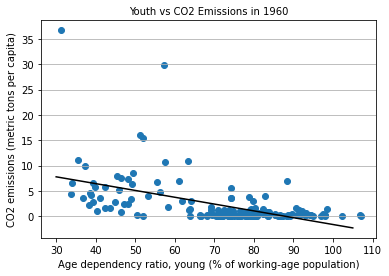

In [87]:
# Scatter Plot of Countries´ Youth Proportion vs their CO2 Emissions in 1960 

%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression


fig, axis = plt.subplots()

# Grid lines, Xticks, Xlabel, Ylabel
axis.yaxis.grid(True)
axis.set_title('Youth vs CO2 Emissions in 1960',fontsize=10)
axis.set_xlabel(young['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(co2['IndicatorName'].iloc[0],fontsize=10)

X = sixties['Value_x']
Y = sixties['Value_y']

axis.scatter(X, Y)

#model = LinearRegression()
#model.fit(X, Y)
#linregress(X, Y) #x and y are arrays or lists
#sns.lmplot(x=X, y=Y, data=sixties, fit_reg=True) 

denv = np.linspace(30,105)
linear = st.linregress(X,Y)
plt.plot(denv, linear.intercept + linear.slope*denv, 'black', label='linear regression model')


plt.show()

In [88]:
print('The correlation coefficient is = ' + str(round(linear.rvalue,2)) + ' and the r-squared value = ', str(round(linear.rvalue**2,2)))

The correlation coefficient is = -0.51 and the r-squared value =  0.26


#### The correlation between a high age dependency ratio of younger working adults and the CO2 emissions per capita for each country code have a moderate, negative correlation of -0.51. 

#### The low coefficient of determination of 0.26 indicates that there is a relatively low variation of CO2 emissions per capita explained by the variation of the age dependency ration. This means that the model is not the best fit for the data.

#### We conclude that there is a only a moderate negative correlation between the two variables, and that linear regression is not the best fit for the data, thus not a good predictor model. 

#### We cannot safely say that as the age dependency of young working adults increases, the CO2 emissions of the respective country code will decrease.  